In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

# MEMPERSIAPKAN DATA

In [2]:
# panggil data
df = pd.read_excel('Data Instrumen Grit.xlsx')

# tampilkan data
df

,Usia;Jenis Kelamin;Pendidikan Terakhir;Jabatan;Masa Kerja;KM1;KM2;KM3;KM4;KM5;KM6;KM7;KM8;PU1;PU2;PU3;PU4;PU5;PU6;PU7;PU8;PU9;PU10;PU11;AD1;AD2;AD3;AD4;AD5;AD6;AD7;AD8;AD9;AD10;AD11;AD12;AD13;Cons1;Cons2;Cons3;Cons4;Cons5;Cons6
0,26;Laki-laki;D4/S1;Staf / Pelaksana;6;4;5;3;4;...
1,22;Perempuan;D4/S1;Staf / Pelaksana;2;5;4;5;4;...
2,35;Laki-laki;D4/S1;;5;2;3;3;1;5;4;5;3;2;5;4;3;...
3,32;Laki-laki;D1/D2/D3;Staf / Pelaksana;4;5;4;4...
4,43;Laki-laki;D4/S1;Staf / Pelaksana;23;2;2;4;2...
...,...
212,21;Perempuan;SMA/ setara;Staf / Pelaksana;2;4;...
213,23;Perempuan;D4/S1;Staf / Pelaksana;1.5;4;4;4;...
214,30;Perempuan;S2;Manajer Lini / Pejabat Eselon ...
215,27;Perempuan;D4/S1;Staf / Pelaksana;4;4;4;5;2;...


In [3]:
# merubah struktur data
## menjadikan header sebagai kolom
df_raw = pd.read_excel("Data Instrumen Grit.xlsx", header=None)

## pisahkan data berdasarkan delimiter ';'
df = df_raw[0].str.split(';', expand=True)

## jadikan baris pertama sebagai header
df.columns = df.iloc[0]

## hapus baris pertama
df = df[1:].reset_index(drop=True)

# tampilkan data
df

,Usia,Jenis Kelamin,Pendidikan Terakhir,Jabatan,Masa Kerja,KM1,KM2,KM3,KM4,KM5,...,AD10,AD11,AD12,AD13,Cons1,Cons2,Cons3,Cons4,Cons5,Cons6
0,26,Laki-laki,D4/S1,Staf / Pelaksana,6,4,5,3,4,2,...,3,5,1,5,7,7,6,7,6,7
1,22,Perempuan,D4/S1,Staf / Pelaksana,2,5,4,5,4,5,...,4,4,2,4,7,6,2,7,6,7
2,35,Laki-laki,D4/S1,,5,2,3,3,1,5,...,1,3,4,5,7,7,3,7,3,7
3,32,Laki-laki,D1/D2/D3,Staf / Pelaksana,4,5,4,4,1,5,...,5,5,1,1,7,7,1,7,7,7
4,43,Laki-laki,D4/S1,Staf / Pelaksana,23,2,2,4,2,4,...,4,5,2,1,7,7,1,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,21,Perempuan,SMA/ setara,Staf / Pelaksana,2,4,5,4,3,4,...,4,4,1,2,7,6,3,7,5,6
213,23,Perempuan,D4/S1,Staf / Pelaksana,1.5,4,4,4,3,5,...,4,4,2,2,6,6,2,6,6,6
214,30,Perempuan,S2,Manajer Lini / Pejabat Eselon IV/ III,10,4,5,4,2,4,...,3,4,1,2,7,6,1,7,6,7
215,27,Perempuan,D4/S1,Staf / Pelaksana,4,4,4,5,2,4,...,4,3,2,2,6,5,4,5,6,5


In [4]:
# tampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Usia                 217 non-null    object
 1   Jenis Kelamin        217 non-null    object
 2   Pendidikan Terakhir  217 non-null    object
 3   Jabatan              217 non-null    object
 4   Masa Kerja           217 non-null    object
 5   KM1                  217 non-null    object
 6   KM2                  217 non-null    object
 7   KM3                  217 non-null    object
 8   KM4                  217 non-null    object
 9   KM5                  217 non-null    object
 10  KM6                  217 non-null    object
 11  KM7                  217 non-null    object
 12  KM8                  217 non-null    object
 13  PU1                  217 non-null    object
 14  PU2                  217 non-null    object
 15  PU3                  217 non-null    object
 16  PU4     

In [5]:
# merubah tipe data
## kolom yang tidak diubah
excpet_columns = ['Jenis Kelamin', 'Pendidikan Terakhir', 'Jabatan']

## merubah tipe data kecuali kolom di excpet_columns sebagai category
df[excpet_columns] = df[excpet_columns].astype('category')

## merubah tipe data kolom selain excpet_columns menjadi numeric
df_lain = df.drop(columns=excpet_columns).apply(pd.to_numeric, errors='coerce')

## gabungkan kembali dataframe
df = pd.concat([df[excpet_columns], df_lain], axis=1)

# tampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Jenis Kelamin        217 non-null    category
 1   Pendidikan Terakhir  217 non-null    category
 2   Jabatan              217 non-null    category
 3   Usia                 216 non-null    float64 
 4   Masa Kerja           217 non-null    float64 
 5   KM1                  217 non-null    int64   
 6   KM2                  217 non-null    int64   
 7   KM3                  217 non-null    int64   
 8   KM4                  217 non-null    int64   
 9   KM5                  217 non-null    int64   
 10  KM6                  217 non-null    int64   
 11  KM7                  217 non-null    int64   
 12  KM8                  217 non-null    int64   
 13  PU1                  217 non-null    int64   
 14  PU2                  217 non-null    int64   
 15  PU3                  21

note: Pada kolom Usia ada nilai yang kosong. Namun tidak akan berpengaruh terhadap pengujian item, maka dibiarkan kosong.

In [6]:
# simpan data bersih
clean_data = df.copy()

# Validitas Item

In [7]:
# memilih kolom item 
data_item = clean_data.iloc[:,5:]
data_item

,KM1,KM2,KM3,KM4,KM5,KM6,KM7,KM8,PU1,PU2,...,AD10,AD11,AD12,AD13,Cons1,Cons2,Cons3,Cons4,Cons5,Cons6
0,4,5,3,4,2,1,1,1,3,5,...,3,5,1,5,7,7,6,7,6,7
1,5,4,5,4,5,5,3,5,5,3,...,4,4,2,4,7,6,2,7,6,7
2,2,3,3,1,5,4,5,3,2,5,...,1,3,4,5,7,7,3,7,3,7
3,5,4,4,1,5,4,2,1,1,4,...,5,5,1,1,7,7,1,7,7,7
4,2,2,4,2,4,4,2,2,4,4,...,4,5,2,1,7,7,1,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,4,5,4,3,4,4,2,2,4,4,...,4,4,1,2,7,6,3,7,5,6
213,4,4,4,3,5,5,4,3,4,5,...,4,4,2,2,6,6,2,6,6,6
214,4,5,4,2,4,4,1,3,3,4,...,3,4,1,2,7,6,1,7,6,7
215,4,4,5,2,4,4,3,3,4,4,...,4,3,2,2,6,5,4,5,6,5


In [8]:
# validitas item
for col in data_item.columns:
    item_score = data_item[col]
    total_score = data_item.drop(columns=[col]).sum(axis=1)
    r, p = pearsonr(item_score, total_score)
    # kriteria validitas: p < 0.05 dan r > 0.3
    if (p < 0.05) and (r > 0.3):
        status = "Valid"
    else:
        status = "Tidak Valid"
    print(f"Kolom: {col}, r: {r:.4f}, p-value: {p:.4f}, Status: {status}")

Kolom: KM1, r: 0.2874, p-value: 0.0000, Status: Tidak Valid
Kolom: KM2, r: 0.2490, p-value: 0.0002, Status: Tidak Valid
Kolom: KM3, r: 0.4624, p-value: 0.0000, Status: Valid
Kolom: KM4, r: 0.2339, p-value: 0.0005, Status: Tidak Valid
Kolom: KM5, r: 0.3681, p-value: 0.0000, Status: Valid
Kolom: KM6, r: 0.4313, p-value: 0.0000, Status: Valid
Kolom: KM7, r: 0.0642, p-value: 0.3465, Status: Tidak Valid
Kolom: KM8, r: 0.1189, p-value: 0.0805, Status: Tidak Valid
Kolom: PU1, r: 0.1341, p-value: 0.0485, Status: Tidak Valid
Kolom: PU2, r: 0.3138, p-value: 0.0000, Status: Valid
Kolom: PU3, r: 0.4316, p-value: 0.0000, Status: Valid
Kolom: PU4, r: 0.3927, p-value: 0.0000, Status: Valid
Kolom: PU5, r: 0.1463, p-value: 0.0312, Status: Tidak Valid
Kolom: PU6, r: 0.2503, p-value: 0.0002, Status: Tidak Valid
Kolom: PU7, r: 0.4640, p-value: 0.0000, Status: Valid
Kolom: PU8, r: 0.3785, p-value: 0.0000, Status: Valid
Kolom: PU9, r: 0.1156, p-value: 0.0895, Status: Tidak Valid
Kolom: PU10, r: 0.3463, p-va

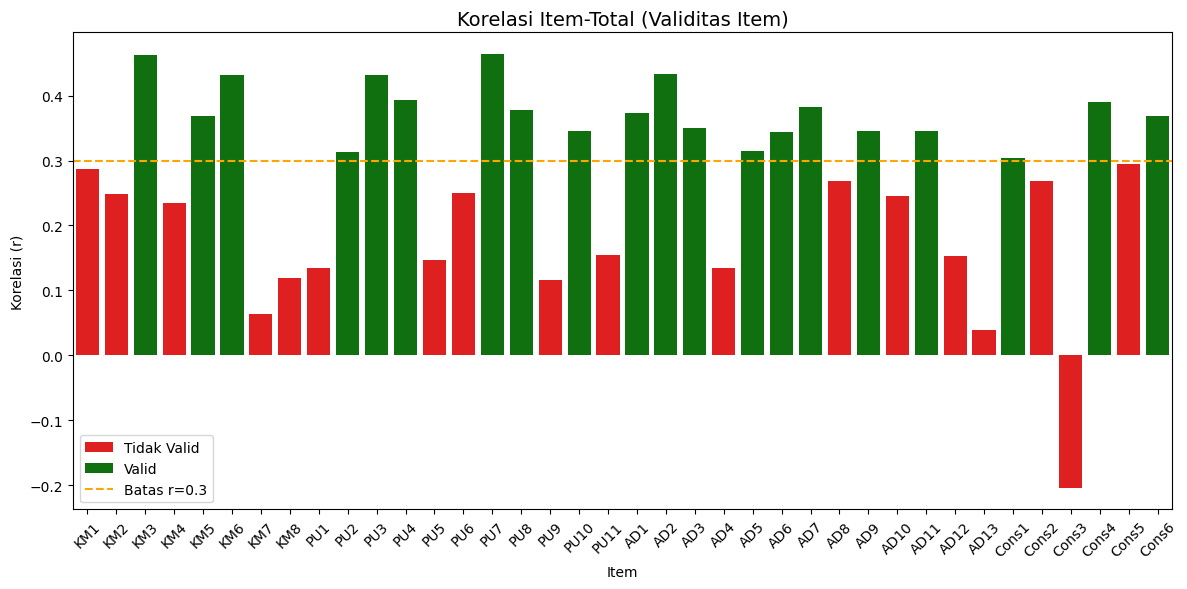

In [9]:
# Simpan hasil loop ke DataFrame biar mudah dipakai
results = []

for col in data_item.columns:
    item_score = data_item[col]
    total_score = data_item.drop(columns=[col]).sum(axis=1)
    r, p = pearsonr(item_score, total_score)
    status = "Valid" if (p < 0.05) and (r > 0.3) else "Tidak Valid"
    results.append({"Item": col, "r": r, "p-value": p, "Status": status})

df_validitas = pd.DataFrame(results)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_validitas, x="Item", y="r", hue="Status", palette={"Valid":"green","Tidak Valid":"red"})

# Tambahkan garis batas r=0.3
plt.axhline(0.3, color="orange", linestyle="--", label="Batas r=0.3")

plt.title("Korelasi Item-Total (Validitas Item)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Korelasi (r)")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
data_item_valid = data_item.drop(columns=['KM1', 'KM2', 'KM4', 'KM7', 'KM8',
                                          'PU1', 'PU5', 'PU6', 'PU9', 'PU11',
                                          'AD4', 'AD8', 'AD10', 'AD12', 'AD13',
                                          'Cons2', 'Cons3', 'Cons5'])

In [11]:
data_item_valid

,KM3,KM5,KM6,PU2,PU3,PU4,PU7,PU8,PU10,AD1,AD2,AD3,AD5,AD6,AD7,AD9,AD11,Cons1,Cons4,Cons6
0,3,2,1,5,1,1,5,1,1,1,2,4,2,1,1,1,5,7,7,7
1,5,5,5,3,5,5,3,4,2,3,4,5,4,3,3,5,4,7,7,7
2,3,5,4,5,4,3,2,3,3,3,5,4,4,3,2,5,3,7,7,7
3,4,5,4,4,4,4,4,4,3,4,5,5,5,5,5,1,5,7,7,7
4,4,4,4,4,4,4,2,3,4,4,4,4,4,4,5,2,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,4,4,4,4,4,3,2,5,2,4,3,4,4,4,4,2,4,7,7,6
213,4,5,5,5,2,4,4,4,4,4,4,4,4,2,4,2,4,6,6,6
214,4,4,4,4,4,4,4,5,4,4,4,4,4,3,3,3,4,7,7,7
215,5,4,4,4,5,4,4,4,3,4,3,4,3,2,3,3,3,6,5,5


In [12]:
# cek kembali validitas item
for col in data_item_valid.columns:
    item_score = data_item_valid[col]
    total_score = data_item_valid.drop(columns=[col]).sum(axis=1)
    r, p = pearsonr(item_score, total_score)
    # kriteria validitas: p < 0.05 dan r > 0.3
    if (p < 0.05) and (r > 0.3):
        status = "Valid"
    else:
        status = "Tidak Valid"
    print(f"Kolom: {col}, r: {r:.4f}, p-value: {p:.4f}", f"Status: {status}")

Kolom: KM3, r: 0.4423, p-value: 0.0000 Status: Valid
Kolom: KM5, r: 0.5901, p-value: 0.0000 Status: Valid
Kolom: KM6, r: 0.6500, p-value: 0.0000 Status: Valid
Kolom: PU2, r: 0.4597, p-value: 0.0000 Status: Valid
Kolom: PU3, r: 0.5343, p-value: 0.0000 Status: Valid
Kolom: PU4, r: 0.4639, p-value: 0.0000 Status: Valid
Kolom: PU7, r: 0.4292, p-value: 0.0000 Status: Valid
Kolom: PU8, r: 0.4635, p-value: 0.0000 Status: Valid
Kolom: PU10, r: 0.5312, p-value: 0.0000 Status: Valid
Kolom: AD1, r: 0.5867, p-value: 0.0000 Status: Valid
Kolom: AD2, r: 0.5631, p-value: 0.0000 Status: Valid
Kolom: AD3, r: 0.4418, p-value: 0.0000 Status: Valid
Kolom: AD5, r: 0.4189, p-value: 0.0000 Status: Valid
Kolom: AD6, r: 0.5014, p-value: 0.0000 Status: Valid
Kolom: AD7, r: 0.4997, p-value: 0.0000 Status: Valid
Kolom: AD9, r: 0.0631, p-value: 0.3549 Status: Tidak Valid
Kolom: AD11, r: 0.4144, p-value: 0.0000 Status: Valid
Kolom: Cons1, r: 0.5181, p-value: 0.0000 Status: Valid
Kolom: Cons4, r: 0.6458, p-value: 0.

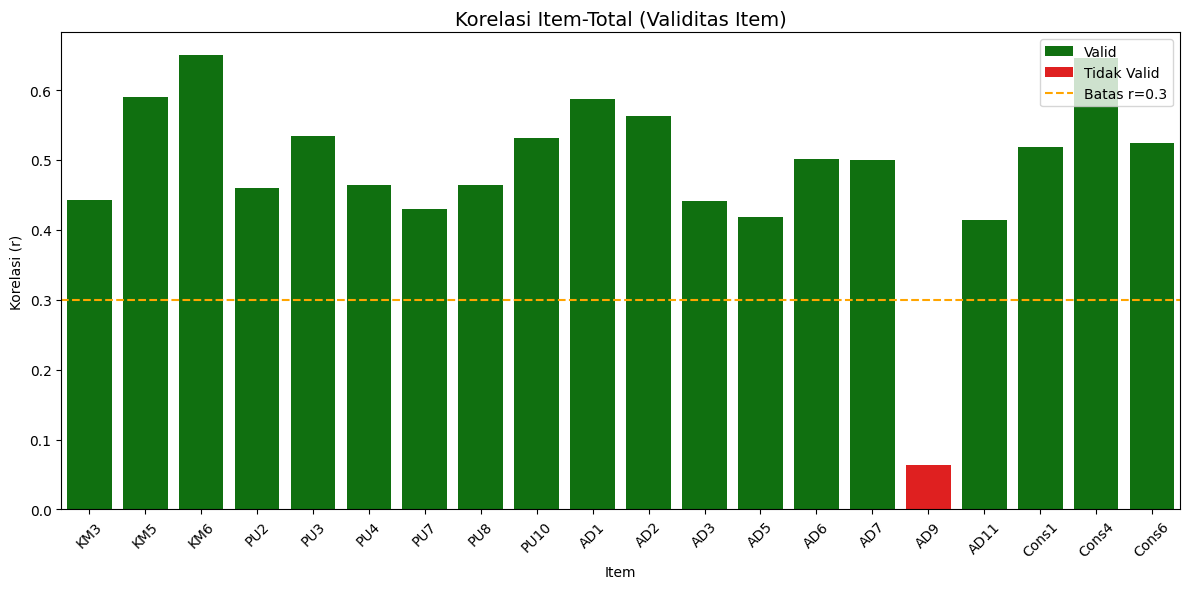

In [13]:
# Simpan hasil loop ke DataFrame biar mudah dipakai
results = []

for col in data_item_valid.columns:
    item_score = data_item_valid[col]
    total_score = data_item_valid.drop(columns=[col]).sum(axis=1)
    r, p = pearsonr(item_score, total_score)
    status = "Valid" if (p < 0.05) and (r > 0.3) else "Tidak Valid"
    results.append({"Item": col, "r": r, "p-value": p, "Status": status})

df_validitas = pd.DataFrame(results)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_validitas, x="Item", y="r", hue="Status", palette={"Valid":"green","Tidak Valid":"red"})

# Tambahkan garis batas r=0.3
plt.axhline(0.3, color="orange", linestyle="--", label="Batas r=0.3")

plt.title("Korelasi Item-Total (Validitas Item)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Korelasi (r)")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
data_item_valid = data_item_valid.drop(columns=['AD9'])

In [15]:
# cek kembali validitas item
for col in data_item_valid.columns:
    item_score = data_item_valid[col]
    total_score = data_item_valid.drop(columns=[col]).sum(axis=1)
    r, p = pearsonr(item_score, total_score)
    # kriteria validitas: p < 0.05 dan r > 0.3
    if (p < 0.05) and (r > 0.3):
        status = "Valid"
    else:
        status = "Tidak Valid"
    print(f"Kolom: {col}, r: {r:.4f}, p-value: {p:.4f}", f"Status: {status}")

Kolom: KM3, r: 0.4311, p-value: 0.0000 Status: Valid
Kolom: KM5, r: 0.5955, p-value: 0.0000 Status: Valid
Kolom: KM6, r: 0.6624, p-value: 0.0000 Status: Valid
Kolom: PU2, r: 0.4694, p-value: 0.0000 Status: Valid
Kolom: PU3, r: 0.5194, p-value: 0.0000 Status: Valid
Kolom: PU4, r: 0.4686, p-value: 0.0000 Status: Valid
Kolom: PU7, r: 0.4163, p-value: 0.0000 Status: Valid
Kolom: PU8, r: 0.4678, p-value: 0.0000 Status: Valid
Kolom: PU10, r: 0.5318, p-value: 0.0000 Status: Valid
Kolom: AD1, r: 0.5994, p-value: 0.0000 Status: Valid
Kolom: AD2, r: 0.5653, p-value: 0.0000 Status: Valid
Kolom: AD3, r: 0.4441, p-value: 0.0000 Status: Valid
Kolom: AD5, r: 0.4286, p-value: 0.0000 Status: Valid
Kolom: AD6, r: 0.5143, p-value: 0.0000 Status: Valid
Kolom: AD7, r: 0.5063, p-value: 0.0000 Status: Valid
Kolom: AD11, r: 0.4134, p-value: 0.0000 Status: Valid
Kolom: Cons1, r: 0.5249, p-value: 0.0000 Status: Valid
Kolom: Cons4, r: 0.6608, p-value: 0.0000 Status: Valid
Kolom: Cons6, r: 0.5244, p-value: 0.0000

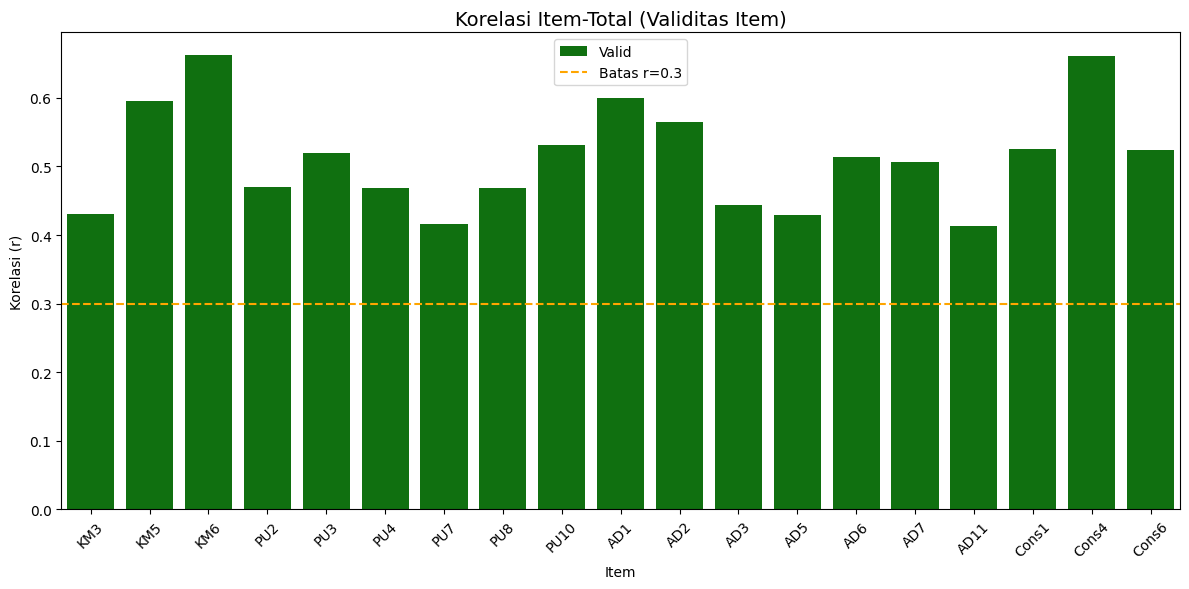

In [16]:
# Simpan hasil loop ke DataFrame biar mudah dipakai
results = []

for col in data_item_valid.columns:
    item_score = data_item_valid[col]
    total_score = data_item_valid.drop(columns=[col]).sum(axis=1)
    r, p = pearsonr(item_score, total_score)
    status = "Valid" if (p < 0.05) and (r > 0.3) else "Tidak Valid"
    results.append({"Item": col, "r": r, "p-value": p, "Status": status})

df_validitas = pd.DataFrame(results)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_validitas, x="Item", y="r", hue="Status", palette={"Valid":"green","Tidak Valid":"red"})

# Tambahkan garis batas r=0.3
plt.axhline(0.3, color="orange", linestyle="--", label="Batas r=0.3")

plt.title("Korelasi Item-Total (Validitas Item)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Korelasi (r)")
plt.legend()
plt.tight_layout()
plt.show()

# Reliabilitas Tes

In [17]:
from pingouin import cronbach_alpha

In [18]:
hasil_reliabilitas = cronbach_alpha(data_item_valid)
cetak_hasil = f"Nilai Cronbach's Alpha: {hasil_reliabilitas[0]:.4f}, 95% CI: [{hasil_reliabilitas[1][0]:.4f}, {hasil_reliabilitas[1][1]:.4f}]"
if hasil_reliabilitas[0] >= 0.7:
    cetak_hasil += " (Reliabel)"
else:
    cetak_hasil += " (Tidak Reliabel)"
print(cetak_hasil)

Nilai Cronbach's Alpha: 0.8867, 95% CI: [0.8640, 0.9070] (Reliabel)


# Membuat norma

## Norma Umum

In [19]:
from scipy import stats
from scipy.stats import zscore

In [20]:
skor_total = data_item_valid.sum(axis=1)
rata_rata = skor_total.mean().round(6)
std_deviasi = skor_total.std(ddof=0).round(6)
minimal = skor_total.min()
maximal = skor_total.max()

In [21]:
# Membuat rentang skor dari minimal sampai maksimal
skor_range = np.arange(minimal, maximal+1)

# Menghitung Z-Score (rumus Z-Score: (X - mean) / std)
z_scores = ((skor_range - rata_rata) / std_deviasi).round(6)

# Menghitung T-Score (rumus T-Score: 50 + 10 * Z-Score)
t_scores = (50 + 10 * z_scores).round(6)

# Membuat DataFrame
norma_score = pd.DataFrame({
    'Skor': skor_range,
    'Z-Score': z_scores,
    'T-Score': t_scores
})

# Tampilkan DataFrame
print(norma_score)

    Skor   Z-Score   T-Score
0     36 -4.530746   4.69254
1     37 -4.425762   5.74238
2     38 -4.320779   6.79221
3     39 -4.215795   7.84205
4     40 -4.110811   8.89189
..   ...       ...       ...
61    97  1.873257  68.73257
62    98  1.978240  69.78240
63    99  2.083224  70.83224
64   100  2.188208  71.88208
65   101  2.293191  72.93191

[66 rows x 3 columns]


In [22]:
# membagi data kedalam 5 kelompok tingkatan
bins = np.linspace(norma_score['T-Score'].min(), norma_score['T-Score'].max(), 6)

# Membagi T-Score ke dalam 5 kelompok
norma_score['Kelompok'] = pd.cut(norma_score['T-Score'], bins=bins, labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'], include_lowest=True)

# Tampilkan DataFrame dengan kolom kelompok
print(norma_score)

    Skor   Z-Score   T-Score       Kelompok
0     36 -4.530746   4.69254  Sangat Rendah
1     37 -4.425762   5.74238  Sangat Rendah
2     38 -4.320779   6.79221  Sangat Rendah
3     39 -4.215795   7.84205  Sangat Rendah
4     40 -4.110811   8.89189  Sangat Rendah
..   ...       ...       ...            ...
61    97  1.873257  68.73257  Sangat Tinggi
62    98  1.978240  69.78240  Sangat Tinggi
63    99  2.083224  70.83224  Sangat Tinggi
64   100  2.188208  71.88208  Sangat Tinggi
65   101  2.293191  72.93191  Sangat Tinggi

[66 rows x 4 columns]


## Norma per Jabatan

In [23]:
data_full = pd.concat([clean_data['Jabatan'], data_item_valid], axis=1)
data_full

,Jabatan,KM3,KM5,KM6,PU2,PU3,PU4,PU7,PU8,PU10,AD1,AD2,AD3,AD5,AD6,AD7,AD11,Cons1,Cons4,Cons6
0,Staf / Pelaksana,3,2,1,5,1,1,5,1,1,1,2,4,2,1,1,5,7,7,7
1,Staf / Pelaksana,5,5,5,3,5,5,3,4,2,3,4,5,4,3,3,4,7,7,7
2,,3,5,4,5,4,3,2,3,3,3,5,4,4,3,2,3,7,7,7
3,Staf / Pelaksana,4,5,4,4,4,4,4,4,3,4,5,5,5,5,5,5,7,7,7
4,Staf / Pelaksana,4,4,4,4,4,4,2,3,4,4,4,4,4,4,5,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Staf / Pelaksana,4,4,4,4,4,3,2,5,2,4,3,4,4,4,4,4,7,7,6
213,Staf / Pelaksana,4,5,5,5,2,4,4,4,4,4,4,4,4,2,4,4,6,6,6
214,Manajer Lini / Pejabat Eselon IV/ III,4,4,4,4,4,4,4,5,4,4,4,4,4,3,3,4,7,7,7
215,Staf / Pelaksana,5,4,4,4,5,4,4,4,3,4,3,4,3,2,3,3,6,5,5


### STAF / Pelaksana

In [24]:
data_skor_jabatan_Staff = data_full[data_full['Jabatan'] == 'Staf / Pelaksana']
print(data_skor_jabatan_Staff)

              Jabatan  KM3  KM5  KM6  PU2  PU3  PU4  PU7  PU8  PU10  AD1  AD2  \
0    Staf / Pelaksana    3    2    1    5    1    1    5    1     1    1    2   
1    Staf / Pelaksana    5    5    5    3    5    5    3    4     2    3    4   
3    Staf / Pelaksana    4    5    4    4    4    4    4    4     3    4    5   
4    Staf / Pelaksana    4    4    4    4    4    4    2    3     4    4    4   
5    Staf / Pelaksana    4    5    5    4    5    5    3    5     4    5    5   
..                ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   
211  Staf / Pelaksana    5    4    5    4    2    4    2    4     4    4    5   
212  Staf / Pelaksana    4    4    4    4    4    3    2    5     2    4    3   
213  Staf / Pelaksana    4    5    5    5    2    4    4    4     4    4    4   
215  Staf / Pelaksana    5    4    4    4    5    4    4    4     3    4    3   
216  Staf / Pelaksana    4    4    4    4    4    4    3    4     4    4    4   

     AD3  AD5  AD6  AD7  AD

In [25]:
skor_total_staff = data_skor_jabatan_Staff.iloc[:,1:].sum(axis=1)
rata_rata_staff = skor_total_staff.mean().round(6)
std_deviasi__staff = skor_total_staff.std(ddof=0).round(6)
minimal__staff = skor_total_staff.min()
maximal__staff = skor_total_staff.max()

In [26]:
# Membuat rentang skor dari minimal sampai maksimal
skor_range = np.arange(minimal__staff, maximal__staff+1)

# Menghitung Z-Score (rumus Z-Score: (X - mean) / std)
z_scores = ((skor_range - rata_rata_staff) / std_deviasi__staff).round(6)

# Menghitung T-Score (rumus T-Score: 50 + 10 * Z-Score)
t_scores = (50 + 10 * z_scores).round(6)

# Membuat DataFrame
norma_score_staff = pd.DataFrame({
    'Skor': skor_range,
    'Z-Score': z_scores,
    'T-Score': t_scores
})

# Tampilkan DataFrame
print(norma_score_staff)

    Skor   Z-Score   T-Score
0     36 -4.396975   6.03025
1     37 -4.293765   7.06235
2     38 -4.190555   8.09445
3     39 -4.087345   9.12655
4     40 -3.984136  10.15864
..   ...       ...       ...
61    97  1.898817  68.98817
62    98  2.002027  70.02027
63    99  2.105236  71.05236
64   100  2.208446  72.08446
65   101  2.311656  73.11656

[66 rows x 3 columns]


In [27]:
# membagi data kedalam 5 kelompok tingkatan
bins = np.linspace(norma_score_staff['T-Score'].min(), norma_score_staff['T-Score'].max(), 6)

# Membagi T-Score ke dalam 5 kelompok
norma_score_staff['Kelompok'] = pd.cut(norma_score_staff['T-Score'], bins=bins, labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'], include_lowest=True)

# Tampilkan DataFrame dengan kolom kelompok
print(norma_score_staff)

    Skor   Z-Score   T-Score       Kelompok
0     36 -4.396975   6.03025  Sangat Rendah
1     37 -4.293765   7.06235  Sangat Rendah
2     38 -4.190555   8.09445  Sangat Rendah
3     39 -4.087345   9.12655  Sangat Rendah
4     40 -3.984136  10.15864  Sangat Rendah
..   ...       ...       ...            ...
61    97  1.898817  68.98817  Sangat Tinggi
62    98  2.002027  70.02027  Sangat Tinggi
63    99  2.105236  71.05236  Sangat Tinggi
64   100  2.208446  72.08446  Sangat Tinggi
65   101  2.311656  73.11656  Sangat Tinggi

[66 rows x 4 columns]


### Eksekutif

In [28]:
data_skor_jabatan_eksekutif = data_full[data_full['Jabatan'] == 'Eksekutif / Pejabat Eselon II']
print(data_skor_jabatan_eksekutif)

                           Jabatan  KM3  KM5  KM6  PU2  PU3  PU4  PU7  PU8  \
8    Eksekutif / Pejabat Eselon II    3    3    3    3    4    3    4    3   
10   Eksekutif / Pejabat Eselon II    5    5    5    5    5    5    4    5   
70   Eksekutif / Pejabat Eselon II    5    4    5    4    4    5    4    4   
82   Eksekutif / Pejabat Eselon II    4    4    4    4    4    4    3    4   
178  Eksekutif / Pejabat Eselon II    5    5    5    4    3    2    2    2   
191  Eksekutif / Pejabat Eselon II    5    5    5    4    4    4    4    5   
196  Eksekutif / Pejabat Eselon II    5    5    5    4    3    5    5    5   
206  Eksekutif / Pejabat Eselon II    3    3    4    4    4    4    3    5   

     PU10  AD1  AD2  AD3  AD5  AD6  AD7  AD11  Cons1  Cons4  Cons6  
8       4    5    3    4    4    3    3     5      7      7      6  
10      5    5    4    3    5    4    3     5      7      7      6  
70      4    3    5    5    4    4    4     4      6      6      6  
82      4    4    5  

In [29]:
skor_total_eksekutif = data_skor_jabatan_eksekutif.iloc[:,1:].sum(axis=1)
rata_rata_eksekutif = skor_total_eksekutif.mean().round(6)
std_deviasi__eksekutif = skor_total_eksekutif.std(ddof=0).round(6)
minimal__eksekutif = skor_total_eksekutif.min()
maximal__eksekutif = skor_total_eksekutif.max()

# Membuat rentang skor dari minimal sampai maksimal
skor_range = np.arange(minimal__eksekutif, maximal__eksekutif+1)
# Menghitung Z-Score (rumus Z-Score: (X - mean) / std)
z_scores = ((skor_range - rata_rata_eksekutif) / std_deviasi__eksekutif).round(6)
# Menghitung T-Score (rumus T-Score: 50 + 10 * Z-Score)
t_scores = (50 + 10 * z_scores).round(6)
# Membuat DataFrame
norma_score_eksekutif = pd.DataFrame({
    'Skor': skor_range,
    'Z-Score': z_scores,
    'T-Score': t_scores
})

# membagi data kedalam 5 kelompok tingkatan
bins = np.linspace(norma_score_eksekutif['T-Score'].min(), norma_score_eksekutif['T-Score'].max(), 6)
# Membagi T-Score ke dalam 5 kelompok
norma_score_eksekutif['Kelompok'] = pd.cut(norma_score_eksekutif['T-Score'], bins=bins, labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'], include_lowest=True)
# Tampilkan DataFrame dengan kolom kelompok
print(norma_score_eksekutif)

    Skor   Z-Score   T-Score       Kelompok
0     74 -1.439049  35.60951  Sangat Rendah
1     75 -1.306723  36.93277  Sangat Rendah
2     76 -1.174396  38.25604  Sangat Rendah
3     77 -1.042070  39.57930  Sangat Rendah
4     78 -0.909744  40.90256  Sangat Rendah
5     79 -0.777417  42.22583         Rendah
6     80 -0.645091  43.54909         Rendah
7     81 -0.512765  44.87235         Rendah
8     82 -0.380438  46.19562         Rendah
9     83 -0.248112  47.51888         Rendah
10    84 -0.115786  48.84214         Sedang
11    85  0.016541  50.16541         Sedang
12    86  0.148867  51.48867         Sedang
13    87  0.281193  52.81193         Sedang
14    88  0.413520  54.13520         Sedang
15    89  0.545846  55.45846         Tinggi
16    90  0.678172  56.78172         Tinggi
17    91  0.810499  58.10499         Tinggi
18    92  0.942825  59.42825         Tinggi
19    93  1.075151  60.75151         Tinggi
20    94  1.207478  62.07478  Sangat Tinggi
21    95  1.339804  63.39804  Sa

### Manajer Lini / Pejabat Eselon IV / III

In [30]:
data_skor_jabatan_manajer = data_full[data_full['Jabatan'] == 'Manajer Lini / Pejabat Eselon IV/ III']
data_skor_jabatan_manajer

,Jabatan,KM3,KM5,KM6,PU2,PU3,PU4,PU7,PU8,PU10,AD1,AD2,AD3,AD5,AD6,AD7,AD11,Cons1,Cons4,Cons6
6,Manajer Lini / Pejabat Eselon IV/ III,5,2,4,2,3,3,2,5,4,3,3,4,2,2,5,5,5,5,2
9,Manajer Lini / Pejabat Eselon IV/ III,5,4,3,3,5,4,3,3,3,2,3,4,3,3,4,3,4,3,3
11,Manajer Lini / Pejabat Eselon IV/ III,4,5,4,2,4,4,4,5,4,5,1,5,1,3,4,5,7,7,7
16,Manajer Lini / Pejabat Eselon IV/ III,3,3,1,3,2,3,2,2,3,3,3,3,3,3,3,3,7,6,6
17,Manajer Lini / Pejabat Eselon IV/ III,3,4,4,3,2,2,2,3,3,3,3,3,3,3,3,4,7,6,6
19,Manajer Lini / Pejabat Eselon IV/ III,5,5,5,5,5,5,5,5,5,5,4,4,4,5,5,5,7,7,7
26,Manajer Lini / Pejabat Eselon IV/ III,5,4,4,2,2,3,2,2,3,4,4,4,4,4,4,4,6,6,6
37,Manajer Lini / Pejabat Eselon IV/ III,4,5,5,4,5,3,2,2,4,4,5,5,4,5,5,5,7,7,6
57,Manajer Lini / Pejabat Eselon IV/ III,4,4,4,4,3,3,2,4,4,4,3,4,4,4,4,4,6,6,6
59,Manajer Lini / Pejabat Eselon IV/ III,4,5,5,4,4,4,4,4,3,5,5,5,4,5,3,4,7,6,6


In [31]:
skor_total_manajer = data_skor_jabatan_manajer.iloc[:,1:].sum(axis=1)
rata_rata_manajer = skor_total_manajer.mean().round(6)
std_deviasi__manajer = skor_total_manajer.std().round(6)
minimal__manajer = skor_total_manajer.min()
maximal__manajer = skor_total_manajer.max()

# Membuat rentang skor dari minimal sampai maksimal
skor_range = np.arange(minimal__manajer, maximal__manajer+1)
# Menghitung Z-Score (rumus Z-Score: (X - mean) / std)
z_scores = ((skor_range - rata_rata_manajer) / std_deviasi__manajer).round(6)
# Menghitung T-Score (rumus T-Score: 50 + 10 * Z-Score)
t_scores = (50 + 10 * z_scores).round(6)
# Membuat DataFrame
norma_score_manajer = pd.DataFrame({
    'Skor': skor_range,
    'Z-Score': z_scores,
    'T-Score': t_scores
})
# membagi data kedalam 5 kelompok tingkatan
bins = np.linspace(norma_score_manajer['T-Score'].min(), norma_score_manajer['T-Score'].max(), 6)
# Membagi T-Score ke dalam 5 kelompok
norma_score_manajer['Kelompok'] = pd.cut(norma_score_manajer['T-Score'], bins=bins, labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'], include_lowest=True)
# Tampilkan DataFrame dengan kolom kelompok
print(norma_score_manajer)

    Skor   Z-Score   T-Score       Kelompok
0     62 -2.106370  28.93630  Sangat Rendah
1     63 -1.992761  30.07239  Sangat Rendah
2     64 -1.879152  31.20848  Sangat Rendah
3     65 -1.765543  32.34457  Sangat Rendah
4     66 -1.651935  33.48065  Sangat Rendah
5     67 -1.538326  34.61674  Sangat Rendah
6     68 -1.424717  35.75283  Sangat Rendah
7     69 -1.311108  36.88892  Sangat Rendah
8     70 -1.197499  38.02501         Rendah
9     71 -1.083890  39.16110         Rendah
10    72 -0.970281  40.29719         Rendah
11    73 -0.856672  41.43328         Rendah
12    74 -0.743064  42.56936         Rendah
13    75 -0.629455  43.70545         Rendah
14    76 -0.515846  44.84154         Rendah
15    77 -0.402237  45.97763         Sedang
16    78 -0.288628  47.11372         Sedang
17    79 -0.175019  48.24981         Sedang
18    80 -0.061410  49.38590         Sedang
19    81  0.052199  50.52199         Sedang
20    82  0.165807  51.65807         Sedang
21    83  0.279416  52.79416    

In [32]:
with pd.ExcelWriter('Norma Skor.xlsx') as writer:
    norma_score.to_excel(writer, sheet_name='Semua Jabatan', index=False)
    norma_score_staff.to_excel(writer, sheet_name='Staff', index=False)
    norma_score_manajer.to_excel(writer, sheet_name='Manajer', index=False)
    norma_score_eksekutif.to_excel(writer, sheet_name='Eksekutif', index=False)

# Finalisasi Data

## Data Umum

In [33]:
# Hitung skor total, z, dan T
skor_total = data_item_valid.sum(axis=1)
skor_z = zscore(skor_total)
skor_t = 50 + 10 * skor_z

# Binning skor T
kelompok = pd.cut(
    skor_t,
    bins=np.linspace(skor_t.min(), skor_t.max(), 6),
    labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'],
    include_lowest=True
)

# Gabungkan semua
result = pd.concat(
    [
        clean_data[['Jenis Kelamin', 'Pendidikan Terakhir', 'Jabatan', 'Usia', 'Masa Kerja']],
        skor_total.rename('Skor Total'),
        pd.Series(skor_z, index=data_item_valid.index, name='Skor Z'),
        pd.Series(skor_t, index=data_item_valid.index, name='Skor T'),
        pd.Series(kelompok, index=data_item_valid.index, name='Kelompok')
    ],
    axis=1
)

print(result.head())

  Jenis Kelamin Pendidikan Terakhir           Jabatan  Usia  Masa Kerja  \
0     Laki-laki               D4/S1  Staf / Pelaksana  26.0         6.0   
1     Perempuan               D4/S1  Staf / Pelaksana  22.0         2.0   
2     Laki-laki               D4/S1                    35.0         5.0   
3     Laki-laki            D1/D2/D3  Staf / Pelaksana  32.0         4.0   
4     Laki-laki               D4/S1  Staf / Pelaksana  43.0        23.0   

   Skor Total    Skor Z     Skor T       Kelompok  
0          57 -2.326089  26.739108         Rendah  
1          84  0.508469  55.084692         Tinggi  
2          77 -0.226416  47.735837         Tinggi  
3          91  1.243355  62.433547  Sangat Tinggi  
4          84  0.508469  55.084692         Tinggi  


In [34]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Jenis Kelamin        217 non-null    category
 1   Pendidikan Terakhir  217 non-null    category
 2   Jabatan              217 non-null    category
 3   Usia                 216 non-null    float64 
 4   Masa Kerja           217 non-null    float64 
 5   Skor Total           217 non-null    int64   
 6   Skor Z               217 non-null    float64 
 7   Skor T               217 non-null    float64 
 8   Kelompok             217 non-null    category
dtypes: category(4), float64(4), int64(1)
memory usage: 10.2 KB


In [35]:
result.to_excel('Hasil Skor Grit.xlsx', sheet_name='Umum', index=False)

In [36]:
result['Kelompok'].value_counts()

Kelompok
Tinggi           127
Sedang            48
Sangat Tinggi     33
Rendah             8
Sangat Rendah      1
Name: count, dtype: int64

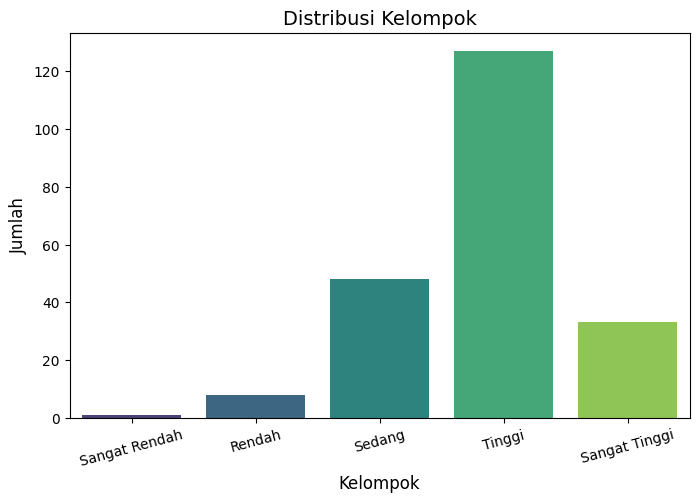

In [37]:
# hitung frekuensi tiap kategori
kelompok_counts_umum = result['Kelompok'].value_counts().sort_index()

# buat barplot
plt.figure(figsize=(8,5))
sns.barplot(x=kelompok_counts_umum.index, y=kelompok_counts_umum.values,hue=kelompok_counts_umum.index, palette="viridis")

# tambahkan label
plt.title("Distribusi Kelompok", fontsize=14)
plt.xlabel("Kelompok", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=15)
plt.show()

## Data per Jabatan

### Staff/Pelaksana

In [38]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Jenis Kelamin        217 non-null    category
 1   Pendidikan Terakhir  217 non-null    category
 2   Jabatan              217 non-null    category
 3   Usia                 216 non-null    float64 
 4   Masa Kerja           217 non-null    float64 
 5   Skor Total           217 non-null    int64   
 6   Skor Z               217 non-null    float64 
 7   Skor T               217 non-null    float64 
 8   Kelompok             217 non-null    category
dtypes: category(4), float64(4), int64(1)
memory usage: 10.2 KB


In [39]:
result_jabatan_staff = result[result['Jabatan'] == 'Staf / Pelaksana'].drop(columns=['Skor Z', 'Skor T', 'Kelompok'])

In [40]:
result_jabatan_staff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 216
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Jenis Kelamin        171 non-null    category
 1   Pendidikan Terakhir  171 non-null    category
 2   Jabatan              171 non-null    category
 3   Usia                 170 non-null    float64 
 4   Masa Kerja           171 non-null    float64 
 5   Skor Total           171 non-null    int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 6.4 KB


In [41]:
result_jabatan_staff = pd.concat(
    [
        result_jabatan_staff,
        pd.Series(
            zscore(result_jabatan_staff['Skor Total']),
            index=result_jabatan_staff.index,
            name='Skor Z'
        ),
        pd.Series(
            50 + 10 * zscore(result_jabatan_staff['Skor Total']),
            index=result_jabatan_staff.index,
            name='Skor T'
        ),
        pd.Series(
            pd.cut(
                50 + 10 * zscore(result_jabatan_staff['Skor Total']),
                bins=np.linspace(
                    (50 + 10 * zscore(result_jabatan_staff['Skor Total'])).min(),
                    (50 + 10 * zscore(result_jabatan_staff['Skor Total'])).max(),
                    6
                ),
                labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'],
                include_lowest=True
            ),
            index=result_jabatan_staff.index,
            name='Kelompok'
        )
    ],
    axis=1
)

result_jabatan_staff


,Jenis Kelamin,Pendidikan Terakhir,Jabatan,Usia,Masa Kerja,Skor Total,Skor Z,Skor T,Kelompok
0,Laki-laki,D4/S1,Staf / Pelaksana,26.0,6.0,57,-2.229571,27.704291,Rendah
1,Perempuan,D4/S1,Staf / Pelaksana,22.0,2.0,84,0.557091,55.570909,Tinggi
3,Laki-laki,D1/D2/D3,Staf / Pelaksana,32.0,4.0,91,1.279559,62.795588,Sangat Tinggi
4,Laki-laki,D4/S1,Staf / Pelaksana,43.0,23.0,84,0.557091,55.570909,Tinggi
5,Laki-laki,D4/S1,Staf / Pelaksana,NaN,6.0,95,1.692398,66.923976,Sangat Tinggi
...,...,...,...,...,...,...,...,...,...
211,Laki-laki,D1/D2/D3,Staf / Pelaksana,22.0,1.0,85,0.660301,56.603006,Tinggi
212,Perempuan,SMA/ setara,Staf / Pelaksana,21.0,2.0,79,0.041042,50.410425,Tinggi
213,Perempuan,D4/S1,Staf / Pelaksana,23.0,1.5,81,0.247462,52.474618,Tinggi
215,Perempuan,D4/S1,Staf / Pelaksana,27.0,4.0,75,-0.371796,46.282037,Sedang


In [42]:
result_jabatan_staff.to_excel('Hasil Skor Grit.xlsx', sheet_name='Staff', index=False)

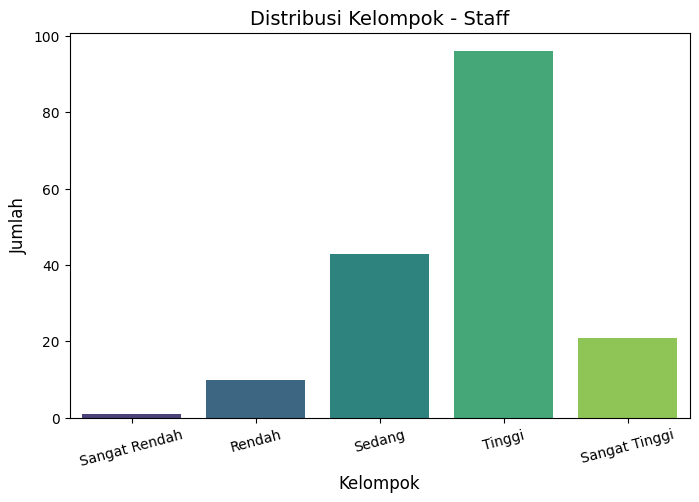

In [43]:
#hitung frekuensi tiap kategori
kelompok_counts_staff = result_jabatan_staff['Kelompok'].value_counts().sort_index()

#buat barplot
plt.figure(figsize=(8,5))
sns.barplot(x=kelompok_counts_staff.index, y=kelompok_counts_staff.values,hue=kelompok_counts_staff.index, palette="viridis")

#tambahkan label
plt.title("Distribusi Kelompok - Staff", fontsize=14)
plt.xlabel("Kelompok", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=15)
plt.show()

### Manajemen Lini / Pejabat Eselon IV / III

In [44]:
result_jabatan_manajemen = result[result['Jabatan'] == 'Manajer Lini / Pejabat Eselon IV/ III'].drop(columns=['Skor Z', 'Skor T', 'Kelompok'])
result_jabatan_manajemen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 6 to 214
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Jenis Kelamin        37 non-null     category
 1   Pendidikan Terakhir  37 non-null     category
 2   Jabatan              37 non-null     category
 3   Usia                 37 non-null     float64 
 4   Masa Kerja           37 non-null     float64 
 5   Skor Total           37 non-null     int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 1.8 KB


In [45]:
result_jabatan_manajemen = pd.concat(
    [
        result_jabatan_manajemen,
        pd.Series(
            zscore(result_jabatan_manajemen['Skor Total']),
            index=result_jabatan_manajemen.index,
            name='Skor Z'
        ),
        pd.Series(
            50 + 10 * zscore(result_jabatan_manajemen['Skor Total']),
            index=result_jabatan_manajemen.index,
            name='Skor T'
        ),
        pd.Series(
            pd.cut(
                50 + 10 * zscore(result_jabatan_manajemen['Skor Total']),
                bins=np.linspace(
                    (50 + 10 * zscore(result_jabatan_manajemen['Skor Total'])).min(),
                    (50 + 10 * zscore(result_jabatan_manajemen['Skor Total'])).max(),
                    6
                ),
                labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'],
                include_lowest=True
            ),
            index=result_jabatan_manajemen.index,
            name='Kelompok'
        )
    ],
    axis=1
)

result_jabatan_manajemen


,Jenis Kelamin,Pendidikan Terakhir,Jabatan,Usia,Masa Kerja,Skor Total,Skor Z,Skor T,Kelompok
6,Perempuan,D4/S1,Manajer Lini / Pejabat Eselon IV/ III,32.0,2.0,66,-1.674721,33.252792,Sangat Rendah
9,Laki-laki,D1/D2/D3,Manajer Lini / Pejabat Eselon IV/ III,48.0,7.0,65,-1.789897,32.101032,Sangat Rendah
11,Laki-laki,D1/D2/D3,Manajer Lini / Pejabat Eselon IV/ III,55.0,8.0,81,0.052919,50.529187,Sedang
16,Perempuan,D4/S1,Manajer Lini / Pejabat Eselon IV/ III,62.0,8.0,62,-2.135425,28.645753,Sangat Rendah
17,Perempuan,D4/S1,Manajer Lini / Pejabat Eselon IV/ III,47.0,12.0,67,-1.559545,34.404551,Sangat Rendah
19,Laki-laki,S2,Manajer Lini / Pejabat Eselon IV/ III,33.0,5.0,98,2.010910,70.109102,Sangat Tinggi
26,Laki-laki,S2,Manajer Lini / Pejabat Eselon IV/ III,34.0,13.0,73,-0.868489,41.315109,Rendah
37,Perempuan,D4/S1,Manajer Lini / Pejabat Eselon IV/ III,33.0,10.0,87,0.743975,57.439745,Tinggi
57,Laki-laki,D4/S1,Manajer Lini / Pejabat Eselon IV/ III,49.0,27.0,77,-0.407785,45.922148,Sedang
59,Laki-laki,S2,Manajer Lini / Pejabat Eselon IV/ III,47.0,21.0,87,0.743975,57.439745,Tinggi


In [46]:
result_jabatan_manajemen.to_excel('Hasil Skor Grit.xlsx', sheet_name='Manajer', index=False)

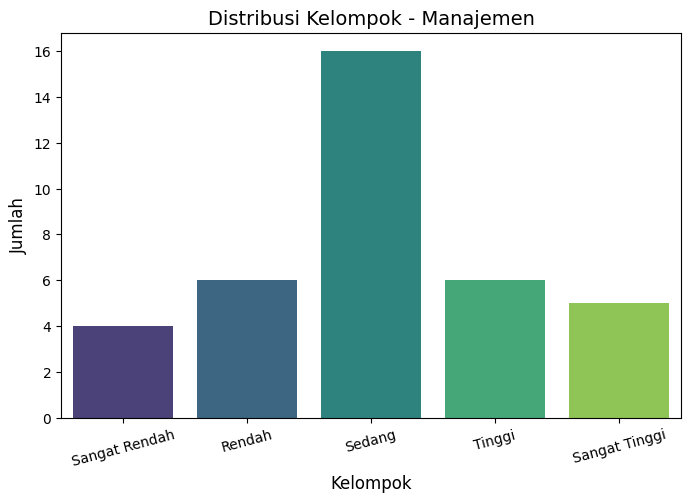

In [47]:
#hitung frekuensi tiap kategori
kelompok_counts_manajemen = result_jabatan_manajemen['Kelompok'].value_counts().sort_index()

#buat barplot
plt.figure(figsize=(8,5))
sns.barplot(x=kelompok_counts_manajemen.index, y=kelompok_counts_manajemen.values,hue=kelompok_counts_manajemen.index, palette="viridis")

#tambahkan label
plt.title("Distribusi Kelompok - Manajemen", fontsize=14)
plt.xlabel("Kelompok", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=15)
plt.show()

### Eksekutif / Pejabat Eselon II

In [48]:
result_jabatan_eksekutif = result[result['Jabatan'] == 'Eksekutif / Pejabat Eselon II'].drop(columns=['Skor Z', 'Skor T', 'Kelompok'])
result_jabatan_eksekutif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 8 to 206
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Jenis Kelamin        8 non-null      category
 1   Pendidikan Terakhir  8 non-null      category
 2   Jabatan              8 non-null      category
 3   Usia                 8 non-null      float64 
 4   Masa Kerja           8 non-null      float64 
 5   Skor Total           8 non-null      int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 820.0 bytes


In [49]:
result_jabatan_eksekutif = pd.concat(
    [
        result_jabatan_eksekutif,
        pd.Series(
            zscore(result_jabatan_eksekutif['Skor Total']),
            index=result_jabatan_eksekutif.index,
            name='Skor Z'
        ),
        pd.Series(
            50 + 10 * zscore(result_jabatan_eksekutif['Skor Total']),
            index=result_jabatan_eksekutif.index,
            name='Skor T'
        ),
        pd.Series(
            pd.cut(
                50 + 10 * zscore(result_jabatan_eksekutif['Skor Total']),
                bins=np.linspace(
                    (50 + 10 * zscore(result_jabatan_eksekutif['Skor Total'])).min(),
                    (50 + 10 * zscore(result_jabatan_eksekutif['Skor Total'])).max(),
                    6
                ),
                labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'],
                include_lowest=True
            ),
            index=result_jabatan_eksekutif.index,
            name='Kelompok'
        )
    ],
    axis=1
)

result_jabatan_eksekutif

,Jenis Kelamin,Pendidikan Terakhir,Jabatan,Usia,Masa Kerja,Skor Total,Skor Z,Skor T,Kelompok
8,Perempuan,D4/S1,Eksekutif / Pejabat Eselon II,22.0,4.0,77,-1.042070,39.579301,Sangat Rendah
10,Laki-laki,D1/D2/D3,Eksekutif / Pejabat Eselon II,25.0,5.0,93,1.075152,60.751515,Tinggi
70,Perempuan,S2,Eksekutif / Pejabat Eselon II,35.0,13.0,86,0.148867,51.488671,Sedang
82,Laki-laki,D4/S1,Eksekutif / Pejabat Eselon II,30.0,6.0,83,-0.248112,47.518881,Rendah
178,Laki-laki,D4/S1,Eksekutif / Pejabat Eselon II,42.0,20.0,80,-0.645091,43.549091,Rendah
191,Laki-laki,D4/S1,Eksekutif / Pejabat Eselon II,50.0,28.0,88,0.413520,54.135198,Sedang
196,Perempuan,D4/S1,Eksekutif / Pejabat Eselon II,35.0,10.0,98,1.736783,67.367832,Sangat Tinggi
206,Laki-laki,D4/S1,Eksekutif / Pejabat Eselon II,36.0,14.0,74,-1.439049,35.609511,Sangat Rendah


In [50]:
result_jabatan_eksekutif.to_excel('Hasil Skor Grit.xlsx', sheet_name='Eksekutif', index=False)

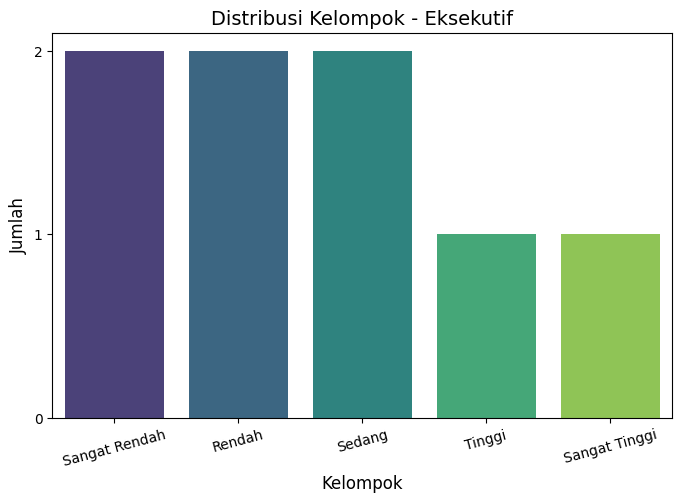

In [51]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8,5))
sns.countplot(
    data=result_jabatan_eksekutif,
    x="Kelompok",
    hue="Kelompok",
    palette="viridis"
)

plt.title("Distribusi Kelompok - Eksekutif", fontsize=14)
plt.xlabel("Kelompok", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=15)

# Paksa y-axis jadi integer
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


In [52]:
with pd.ExcelWriter('Hasil Skor Grit.xlsx', engine='openpyxl') as writer:
    result.to_excel(writer, sheet_name='Umum', index=False)
    result_jabatan_staff.to_excel(writer, sheet_name='Staff', index=False)
    result_jabatan_manajemen.to_excel(writer, sheet_name='Manajer', index=False)
    result_jabatan_eksekutif.to_excel(writer, sheet_name='Eksekutif', index=False)